In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
with open("artifacts/results.pkl", "rb") as f:
    results = pickle.load(f)

lr_results = results["lr_results"]
nb_results = results["nb_results"]

best_lr = results["best_lr"]
best_nb = results["best_nb"]

y_test = results["y_test"]
y_pred_lr = results["y_pred_lr_best"]
y_pred_nb = results["y_pred_nb_best"]

In [4]:
df_lr = pd.DataFrame(lr_results, columns=["Threshold", "LR_Accuracy", "LR_F1"])
df_nb = pd.DataFrame(nb_results, columns=["Threshold", "NB_Accuracy", "NB_F1"])

comparison_df = df_lr.merge(df_nb, on="Threshold")

comparison_df

,Threshold,LR_Accuracy,LR_F1,NB_Accuracy,NB_F1
0,0.10,0.905494,0.905066,0.874981,0.873959
1,0.15,0.948033,0.948021,0.895249,0.894801
2,0.20,0.964365,0.964380,0.908241,0.908038
3,0.25,0.973200,0.973214,0.916333,0.916247
4,0.30,0.978693,0.978704,0.922123,0.922098
5,0.35,0.982925,0.982933,0.925835,0.925843
6,0.40,0.985598,0.985603,0.928062,0.928089
7,0.45,0.987602,0.987606,0.927988,0.928026
8,0.50,0.988196,0.988198,0.945805,0.945810
9,0.55,0.988344,0.988345,0.945063,0.945040


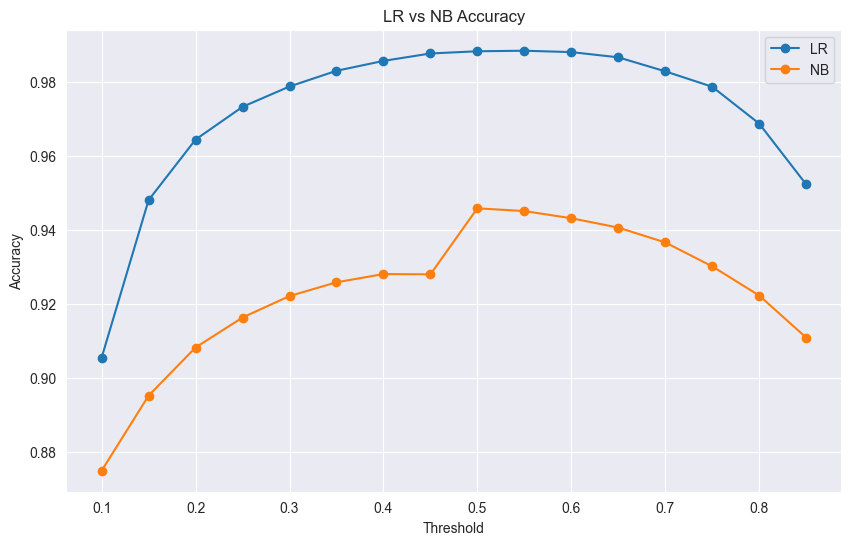

In [5]:
plt.figure(figsize=(10,6))

plt.plot(comparison_df["Threshold"], comparison_df["LR_Accuracy"], marker="o", label="LR")
plt.plot(comparison_df["Threshold"], comparison_df["NB_Accuracy"], marker="o", label="NB")

plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("LR vs NB Accuracy")
plt.legend()
plt.grid(True)
plt.show()

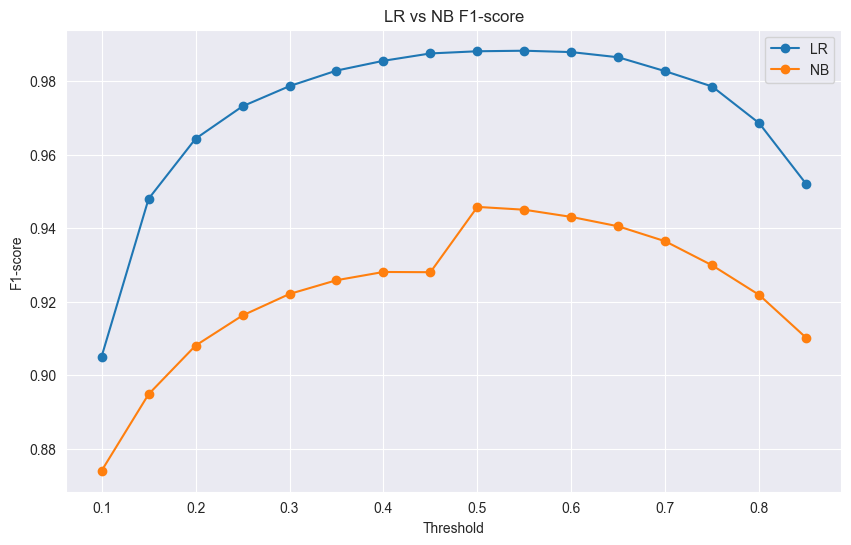

In [6]:
plt.figure(figsize=(10,6))

plt.plot(comparison_df["Threshold"], comparison_df["LR_F1"], marker="o", label="LR")
plt.plot(comparison_df["Threshold"], comparison_df["NB_F1"], marker="o", label="NB")

plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("LR vs NB F1-score")
plt.legend()
plt.grid(True)
plt.show()

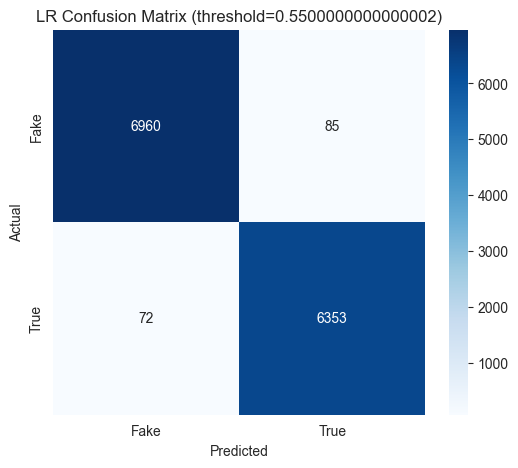

In [7]:
plt.figure(figsize=(6,5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fake", "True"],
            yticklabels=["Fake", "True"])
plt.title(f"LR Confusion Matrix (threshold={best_lr["threshold"]})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

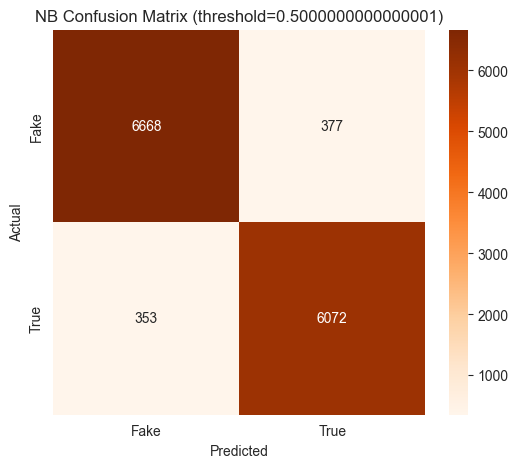

In [8]:
plt.figure(figsize=(6,5))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Fake", "True"],
            yticklabels=["Fake", "True"])
plt.title(f"NB Confusion Matrix (threshold={best_nb['threshold']})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.9883444691907943
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [10]:
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes
Accuracy: 0.9458054936896808
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7045
           1       0.94      0.95      0.94      6425

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470

